In [28]:
import torch

In [29]:
torch.cuda.is_available()

True

In [30]:
data = {
        # "Pure":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp1/epoch_100.pth"),
        # "DenseNet_121_Pretrained":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp2/epoch_100.pth"),
        # "DenseNet_121_init":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp3/epoch_100.pth"),
        # "DenseNet_2":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp4/epoch_100.pth"),
        "Pure":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp1/epoch_100.pth"),
        # "Densenet_pt":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp2/epoch_100.pth"),
        # "Ab1":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp_ab1/epoch_100.pth"),
        # "Ab2":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp_ab2/epoch_100.pth"),
        # "Ab3":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp_ab3/epoch_100.pth"),
        "Ab4":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp_ab4/epoch_100.pth"),
        # "Mobilenet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp15/epoch_100.pth"),
        # "Resnet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp19/epoch_100.pth"),
        # "Shufflenet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp20/epoch_100.pth"),
        # "MobileVit":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp18/epoch_100.pth")
}

In [31]:
# data["final Exp 1"]["history"]["test"].keys()

In [32]:
Epoch = 100

In [33]:
loss_data = {}

In [34]:
# data["Test Exp"]["history"]['val']['F1Score']

In [35]:
for exps in data.keys():
    train_loss = []
    val_loss = []
    for i in data[exps]["history"]['train']["loss"]:
        val = i.cpu().item()
        train_loss.append(val)
    for i in data[exps]["history"]['val']["loss"]:
        val = i.cpu().item()
        # print(val)
        val_loss.append(val)
    loss_data[exps] = (train_loss,val_loss)

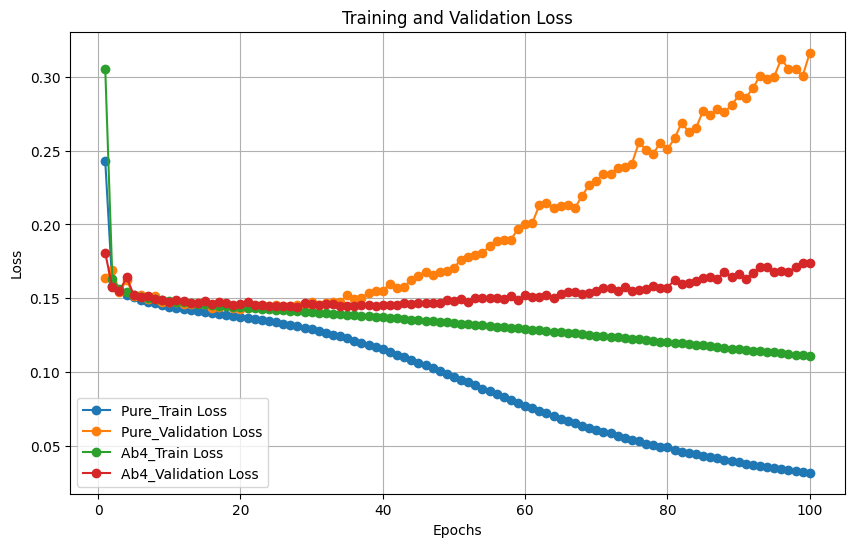

In [36]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, Epoch+1))
# train_loss = data['train']["loss"]
# val_loss = data['val']["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
for exps in loss_data.keys():
    plt.plot(epochs, loss_data[exps][0], label=exps + '_Train Loss', marker='o')
    plt.plot(epochs, loss_data[exps][1], label=exps + '_Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
import plotly.graph_objects as go

# Create the interactive plot
fig = go.Figure()
for exps in loss_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    fig.add_trace(go.Scatter(x=epochs, y=loss_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=loss_data[exps][1], mode='lines+markers', name=exps + '_Validation Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Training and Validation Loss',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    legend=dict(x=0, y=1),
    grid=dict(),
)

fig.show()

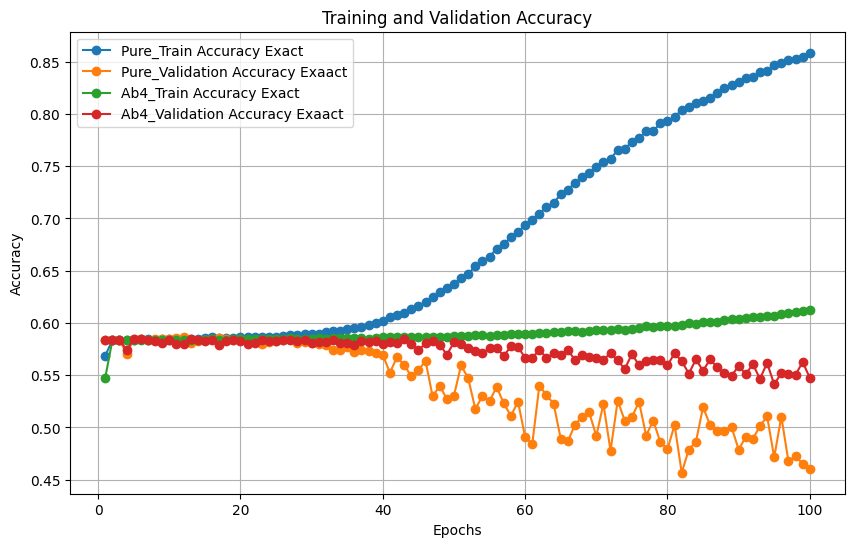

In [38]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, Epoch + 1))
# train_loss = data['train']["loss"]
# val_loss = data['val']["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
for exps in loss_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + '_Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + '_Validation Loss', marker='o')
    plt.plot(epochs, data[exps]["history"]['train']['ExactMatchAccuracy'], label=exps + '_Train Accuracy Exact', marker='o')
    plt.plot(epochs, data[exps]["history"]['val']['ExactMatchAccuracy'], label=exps + '_Validation Accuracy Exaact', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
auroc_data = {}
for exps in data.keys():
    avg_auroc = []
    for epoch, score_list in enumerate(data[exps]["history"]['val']['MultiLabelAUROC']):
        avg_auroc.append(sum(score_list)/14)
    auroc_data[exps] = avg_auroc

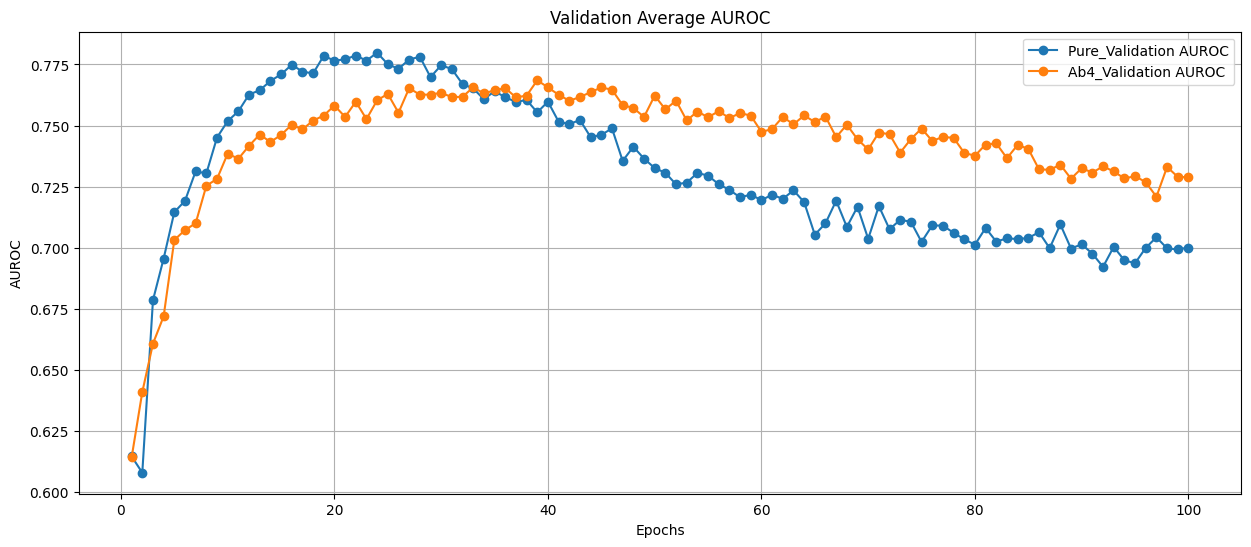

In [40]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in auroc_data.keys():
    plt.plot(epochs, auroc_data[exps], label=exps + '_Validation AUROC', marker='o')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Validation Average AUROC')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
import plotly.graph_objects as go

# Create the interactive plot
fig = go.Figure()
for exps in auroc_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps], mode='lines+markers', name=exps + '_Validation Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Training and Validation Loss',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [42]:
auroc_data = {}
for exps in data.keys():
    avg_auroc = []
    for epoch, score_list in enumerate(data[exps]["history"]['test']['MultiLabelAUROC']):
        avg_auroc.append(sum(score_list)/14)
    auroc_data[exps] = avg_auroc

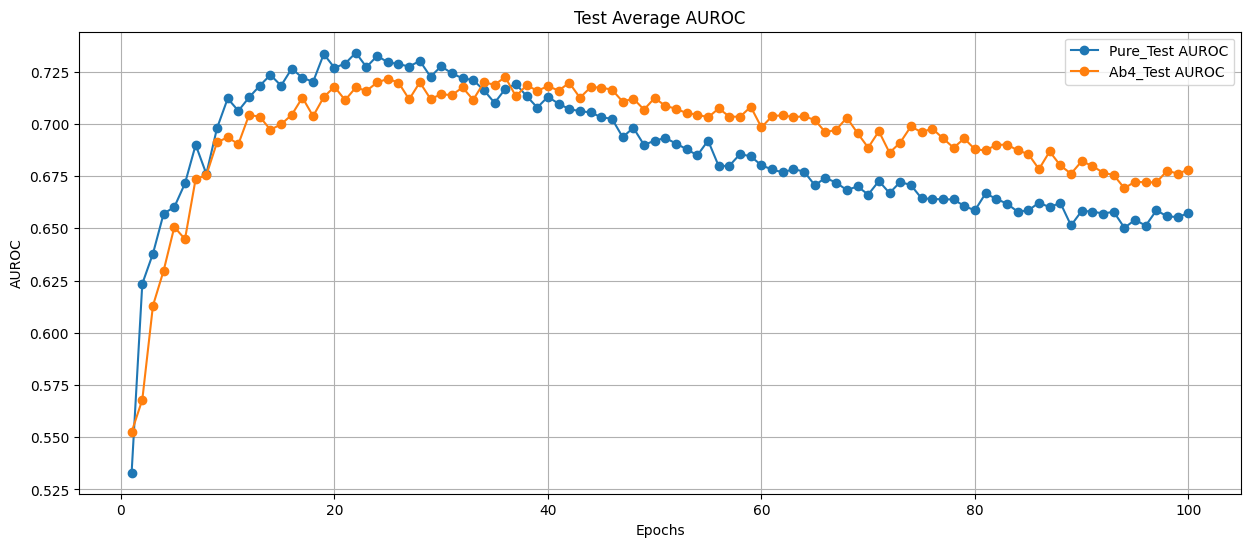

In [43]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in auroc_data.keys():
    plt.plot(epochs, auroc_data[exps], label=exps + '_Test AUROC', marker='o')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Test Average AUROC')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
import plotly.graph_objects as go

# Create the interactive plot
fig = go.Figure()
for exps in auroc_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps], mode='lines+markers', name=exps + '_Validation Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Training and Validation Loss',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [45]:
auroc_data = {}
for exps in data.keys():
    avg_auroc = []
    for epoch, score_list in enumerate(data[exps]["history"]['train']['MultiLabelAUROC']):
        avg_auroc.append(sum(score_list)/14)
    auroc_data[exps] = avg_auroc

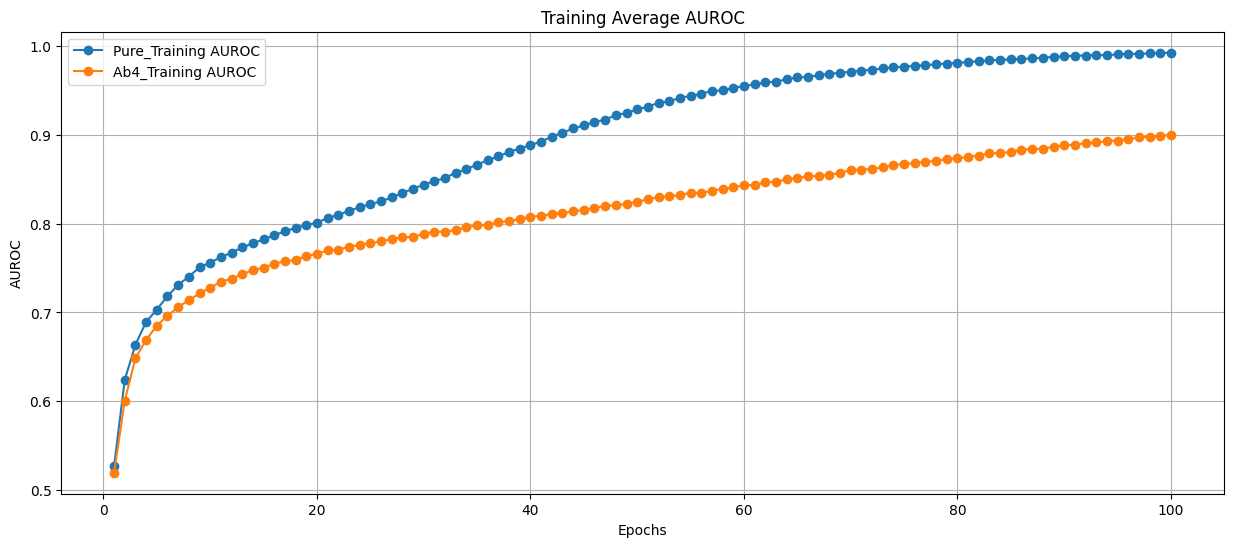

In [46]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in auroc_data.keys():
    plt.plot(epochs, auroc_data[exps], label=exps + '_Training AUROC', marker='o')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Training Average AUROC')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
f1score_data = {}
for exps in data.keys():
    avg_f1score = []
    for epoch, score_list in enumerate(data[exps]["history"]['val']['F1Score']):
        avg_f1score.append(sum(score_list)/14)
    f1score_data[exps] = avg_f1score

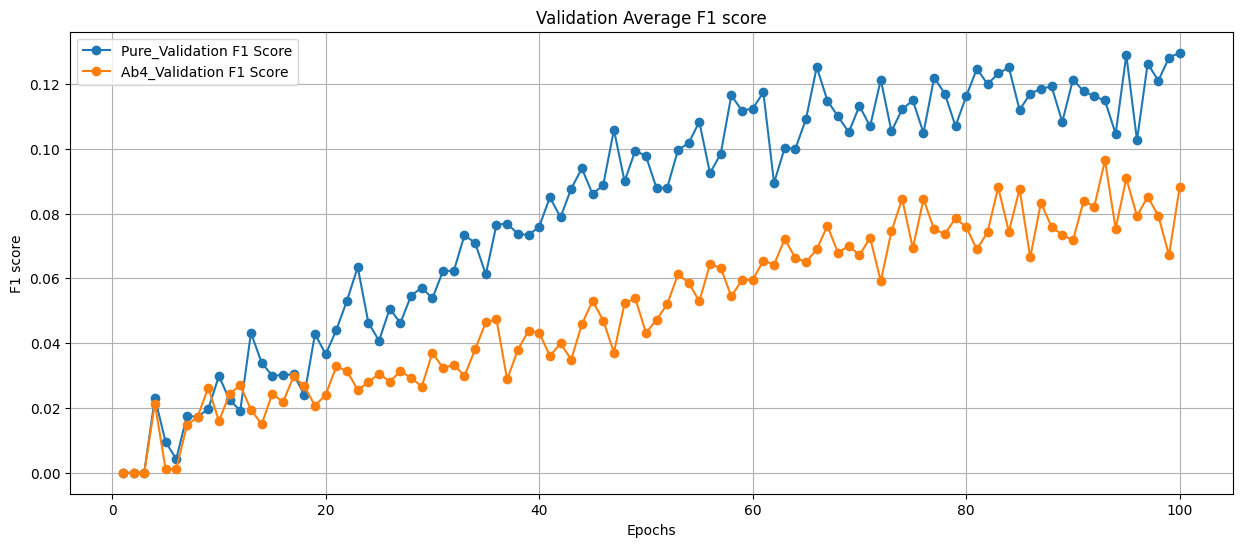

In [48]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in f1score_data.keys():
    plt.plot(epochs, f1score_data[exps], label=exps + '_Validation F1 Score', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.title('Validation Average F1 score')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
f1score_data = {}
for exps in data.keys():
    avg_f1score = []
    for epoch, score_list in enumerate(data[exps]["history"]['train']['F1Score']):
        avg_f1score.append(sum(score_list)/14)
    f1score_data[exps] = avg_f1score

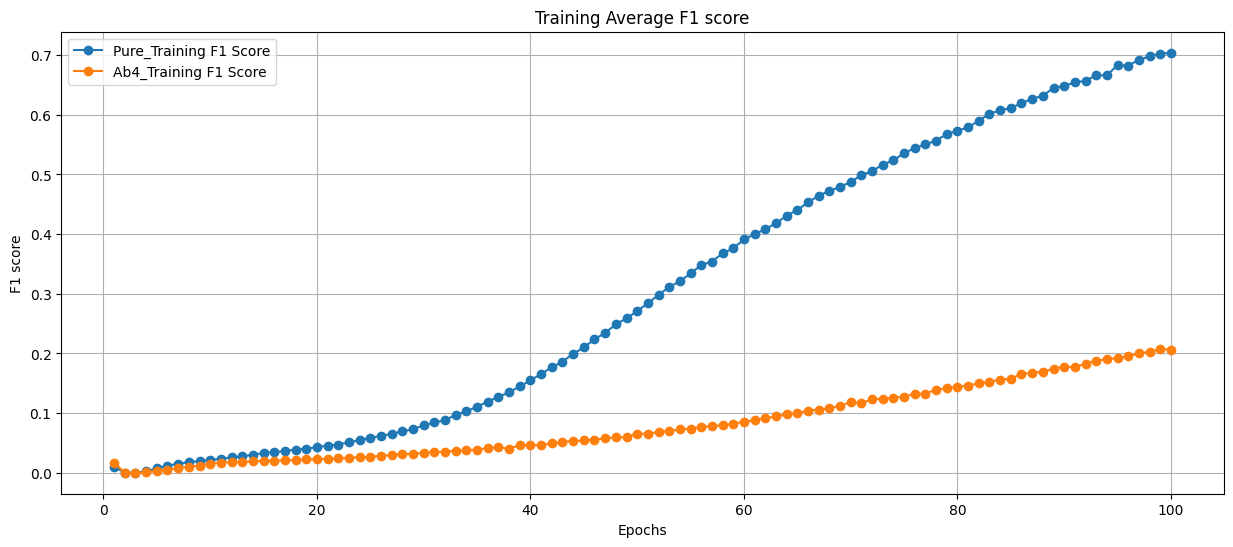

In [50]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in f1score_data.keys():
    plt.plot(epochs, f1score_data[exps], label=exps + '_Training F1 Score', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.title('Training Average F1 score')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
array = [0.14610162, 0.28070175, 0.41036356, 0.22634213, 0.07307172,
       0.03833145, 0.        , 0.12469287, 0.00753904, 0.08813559,
       0.02060086, 0.        , 0.02115541, 0.        ]
print(sum(array)/14)

0.10264542857142857


### EXP1

In [52]:
print(sum([0.7171689095504471, 0.8453925062939172, 0.7808453609443998, 0.6738369442412676, 0.687917727126876, 0.6572283812100279, 0.6367353576171115, 0.774233754366943, 0.7123458630712322, 0.8100705829253516, 0.7199915472381427, 0.7522041729423432, 0.7063393238279273, 0.7928751150939439])/14)

0.7333703961749952


### EXP3

In [53]:
print(sum([0.7220746289262936, 0.8644206382893437, 0.7907053973289888, 0.6588493312340586, 0.7306125532261147, 0.653270884252897, 0.6707584786175897, 0.801723688072129, 0.7222925726176984, 0.8255218568250063, 0.7513508904692253, 0.7543647873213745, 0.7235490484558036, 0.806794872963635])/14)

0.7483064020428686


In [54]:
print(sum()/14)

TypeError: sum() takes at least 1 positional argument (0 given)

In [ ]:
print(sum()/14)

TypeError: sum() takes at least 1 positional argument (0 given)

In [ ]:
print(sum()/14)

TypeError: sum() takes at least 1 positional argument (0 given)

In [ ]:
print(sum()/14)

TypeError: sum() takes at least 1 positional argument (0 given)

In [ ]:
print(sum()/14)

TypeError: sum() takes at least 1 positional argument (0 given)

In [ ]:
print(sum()/14)

TypeError: sum() takes at least 1 positional argument (0 given)

In [ ]:

print(sum()/14)

TypeError: sum() takes at least 1 positional argument (0 given)